# Нейрон для многоклассовой классификации

In [287]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [288]:
# Подготовка тренировочных данных
X, y = load_digits(return_X_y=True)
print(X.shape)

(1797, 64)


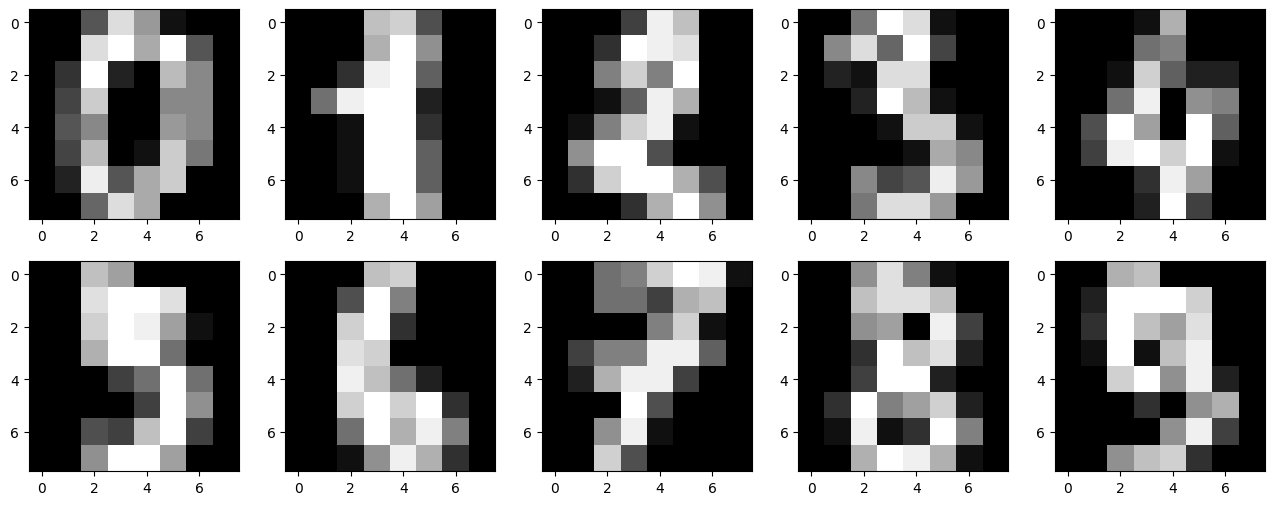

In [289]:
# Представление данных
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8, 8]), cmap='gray')

In [290]:
y.shape

(1797,)

In [291]:
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

In [292]:
# формирование входных данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)
display(y, y.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [293]:
X

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

In [295]:
# Вычисление сигмоид функции
def sigmoid(x):
    x = np.clip(x, a_min=-500, a_max=500)
    return 1 / (1 + np.exp(-x))

# Вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [296]:
# Генерация случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X_train.shape[1], 10))
errors = []
metrics = []

In [297]:
# Тренировка нейронной сети
def train_nn(X, y, num_iters):
    global weights
    for n_iter in range(num_iters):
        # Проход данных через нейрон
        output = run_nn(X)

        # Вычисление ошибки через обратное распространение back-propagation
        error = output - y
        
        # Выполнение корректировки весов
        grad = np.dot(X.T, error * sigmoid_deriv(output))

        weights -= 0.01 * grad
        
        
        error = np.mean(np.abs(error))
        errors.append(error)
        
        # Получение метрики качества
        preds = np.argmax(output, axis=1)
        labels = np.argmax(y, axis=1)
        accuracy = (preds == labels).sum() * 100 / len(labels)
        metrics.append(accuracy)

# Пропускание входных данных через нейрон и получение предсказания
# Конвертация значений во floats
def run_nn(inputs):
    global weights
    inputs = inputs.astype(float)
    output = sigmoid(np.dot(inputs, weights))
    return output

In [298]:
weights.size

640

In [299]:
# Запуск тренировки нейронной сети 
epochs = 20
train_nn(X_train, y_train, epochs)

Предсказание нейронной сети: 
1


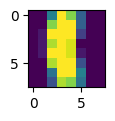

In [300]:
ind = np.random.randint(0, X_test.shape[0])
test_img = X_test[ind]
plt.figure(figsize=(1, 1))
plt.imshow(test_img.reshape([8,8]))

print("Предсказание нейронной сети: ")
print(np.argmax(run_nn(X_test[ind])))

In [301]:
run_nn(X_test[ind])

array([0.00060088, 0.20476382, 0.0130443 , 0.00050418, 0.01509772,
       0.01431121, 0.00285179, 0.00242858, 0.01165651, 0.00096433])

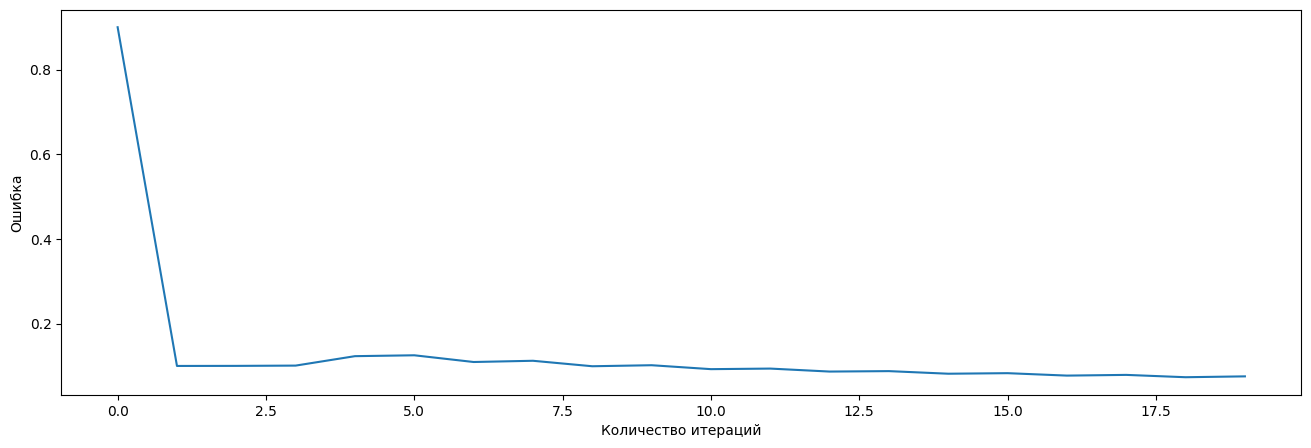

In [302]:
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка')
plt.show()

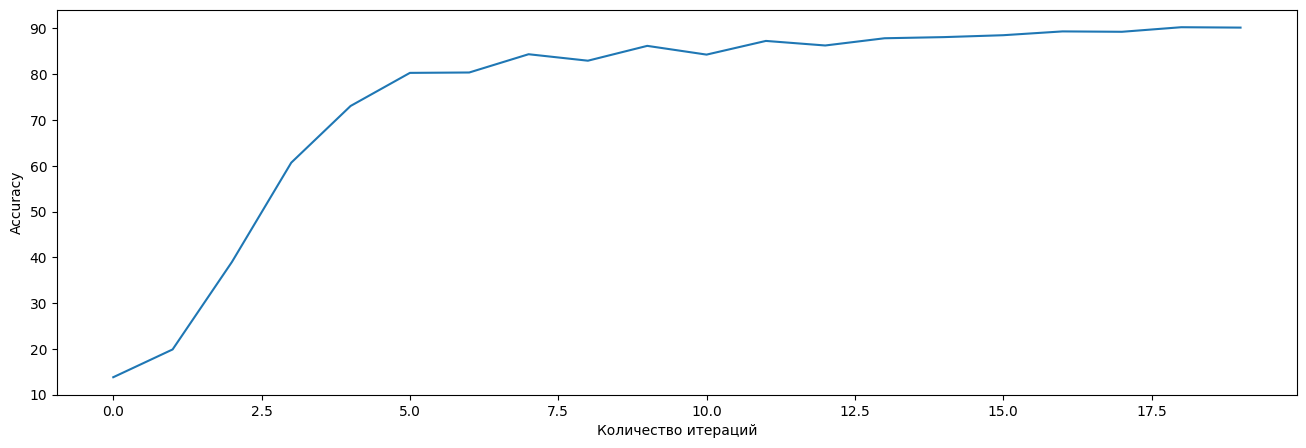

In [303]:
plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

In [304]:
test_preds = np.argmax(run_nn(X_test), axis=1)
test_labels = np.argmax(y_test, axis=1)

test_accuracy = (test_preds == test_labels).sum() * 100 / len(test_labels)
print(f'Accuracy на тесте {test_accuracy:.2f}%')

Accuracy на тесте 90.07%


# Пример построения двухслойной нейронной сети с помощью numpy

In [315]:
# Обучение нейронной сети

# Определим число нейронов скрытого слоя
neuron_numb = 10

# Присваивание случайных весов
np.random.seed(1)
w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

# Скорость обучения (learning rate)
learning_rate = 0.05

# Количество итераций (эпох)
num_epochs = 200

# Массив для ошибок, чтобы потом построить график
errors = []
metrics = []

# Процесс обучения
for i in range(num_epochs):

    # Прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # Обратное распространение (back propagation)
    # с использованием градиентного спуска
    layer2_error = layer2 - y_train  # Производная функции потерь
    layer2_grad = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_grad.dot(w1.T)
    layer1_grad = layer1_error * sigmoid_deriv(layer1)
    
    w1 -= layer1.T.dot(layer2_grad) * learning_rate
    w0 -= layer0.T.dot(layer1_grad) * learning_rate
    
    # Ошибка модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    
    # Метрики качества
    preds = np.argmax(layer2, axis=1)
    labels = np.argmax(y_train, axis=1)
    accuracy = (preds == labels).sum() * 100 / len(labels)
    metrics.append(accuracy)

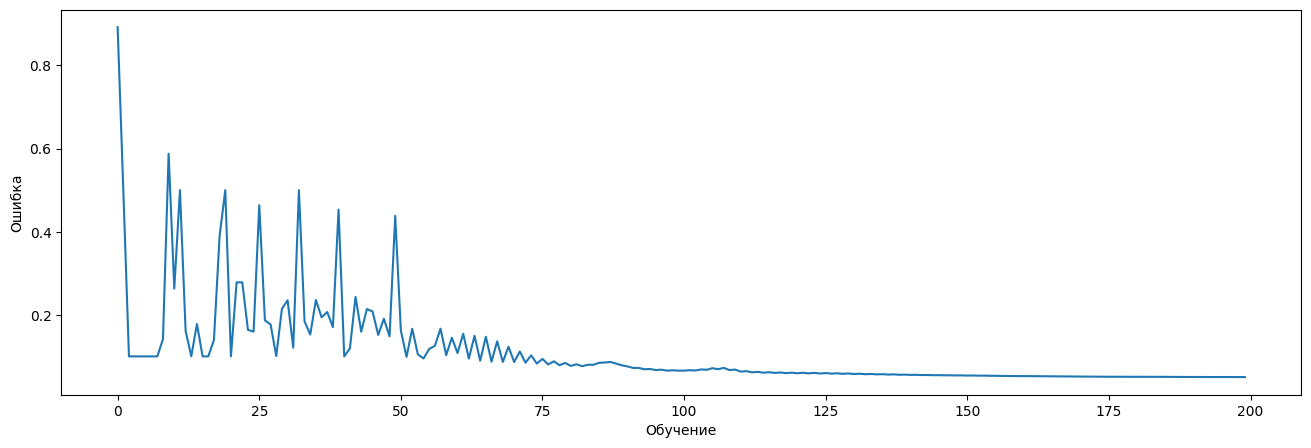

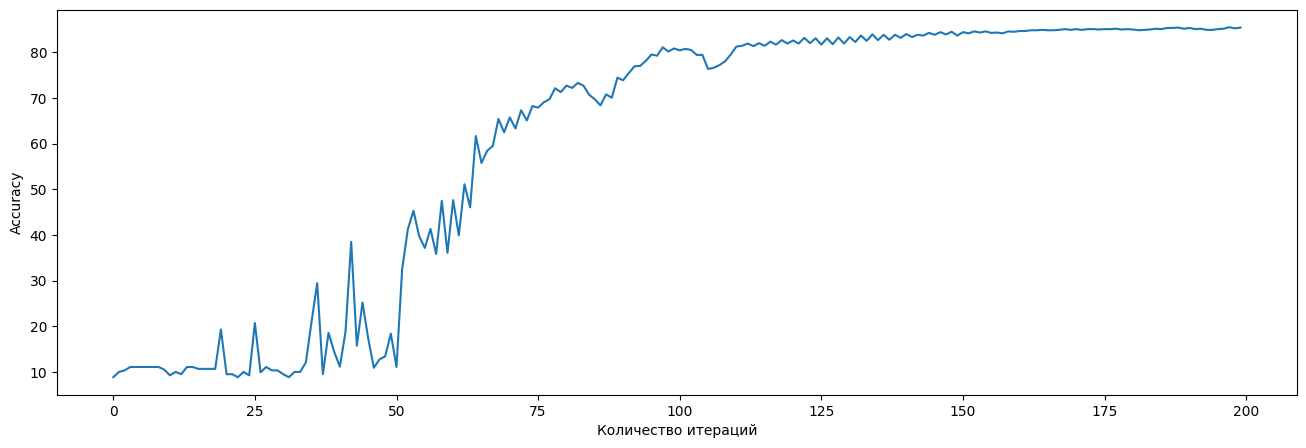

In [316]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

In [317]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

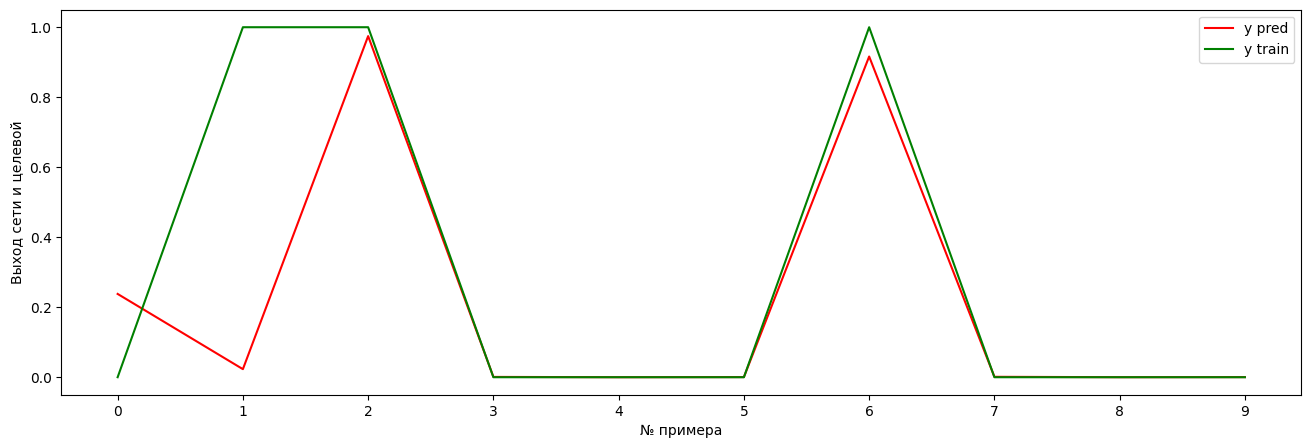

Accuracy на обучении 85.45%


In [318]:
N = 10
label = 2
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('Выход сети и целевой')
plt.legend()
plt.show()
        
print(f"Accuracy на обучении {accuracy:.2f}%")

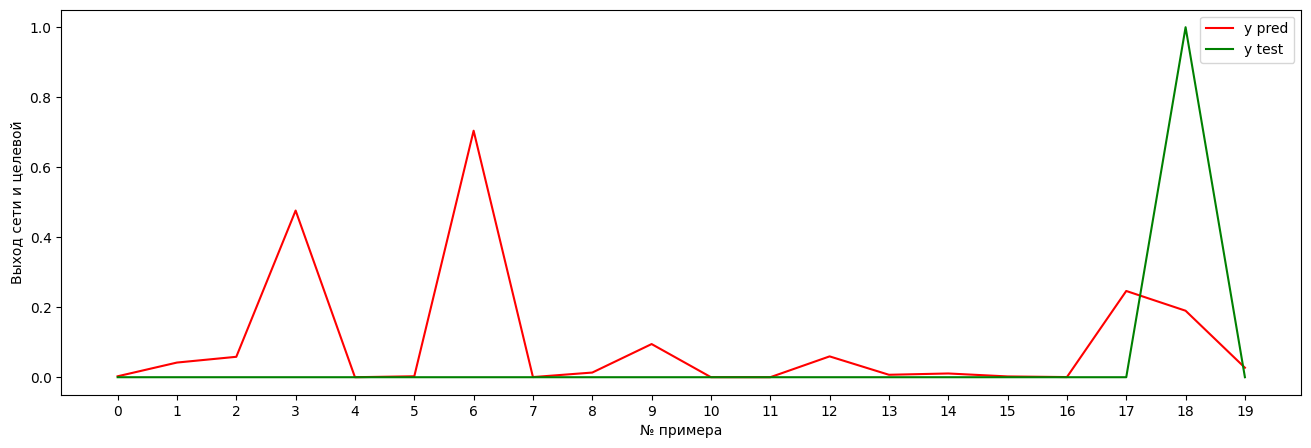

Accuracy на тесте 82.49%


In [319]:
# Прямое распространение(feed forward)
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
    
    
N = 20
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 1], 'r', label='y pred')
plt.plot(y_test[:N, 1], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('Выход сети и целевой')
plt.legend()
plt.show()

# Метрика модели
preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"Accuracy на тесте {accuracy_test:.2f}%")

# Выводы
С увеличением эпох растёт метрика, но есть предел, и с увеличением эпох accuracy начинается ухудщаться. Число нейронов скрытого слоя тоже влияет на метрику, но и ему есть предел. Метрика очень сильно зависит от шага обучения. Причём кардинально меняется если изменить шаг. Нужно тонко подбирать шаг, чтобы попасть в минимум функции. 85 на обучении и 82 на тесте - это максимум, что мне удалось получить.